In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import util
from scipy import signal
import IPython.display as ipd
from pseudo_qmf import PseudoQmfBank
%matplotlib notebook

In [2]:
audio, rate = util.read_audio("../alarm.wav")

In [3]:
audio = audio[0]

In [4]:
audio = audio[np.newaxis, :]

In [5]:
bank = PseudoQmfBank(4)

<IPython.core.display.Javascript object>


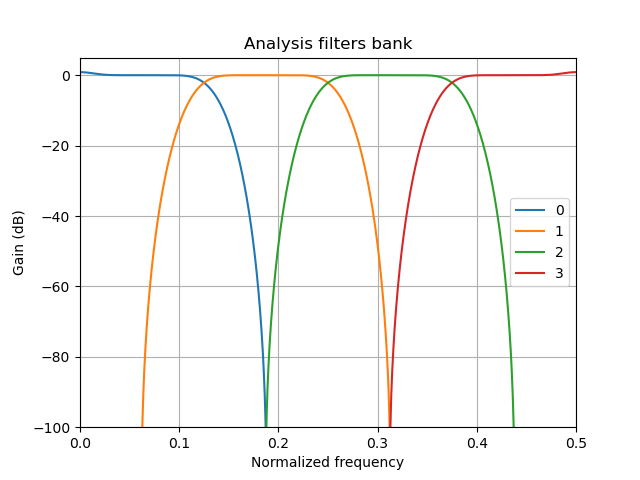

In [6]:
bank.show_analysis_bank()

In [7]:
out = bank.anasynth_pipeline(audio)

In [8]:
ipd.display(ipd.Audio(audio, rate=rate, normalize=True))
ipd.display(ipd.Audio(out, rate=rate, normalize=True))

In [ ]:
ana = bank.analyse(audio)

In [10]:
t = np.arange(len(audio[0]))

In [ ]:
ipd.display(ipd.Audio(ana[0], rate=rate))
ipd.display(ipd.Audio(ana[1], rate=rate))
ipd.display(ipd.Audio(ana[2], rate=rate))
ipd.display(ipd.Audio(ana[3], rate=rate))

<IPython.core.display.Javascript object>


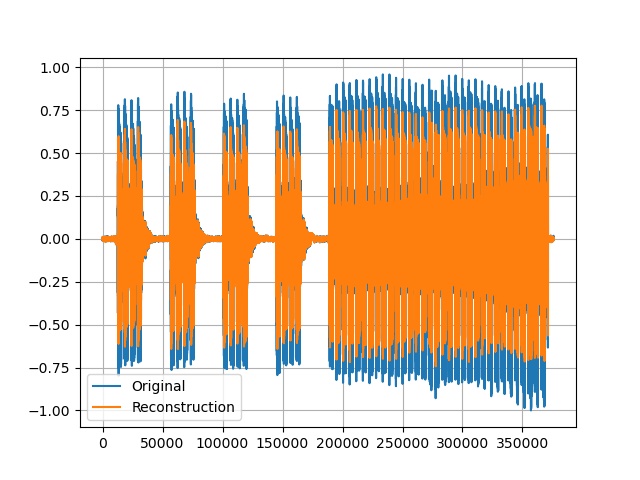

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, audio[0], label="Original")
ax.plot(t, out, label="Reconstruction")
#ax.plot(t, ana[0], label="Lo")
#ax.plot(t, ana[1], label="MidLo")
#ax.plot(t, ana[2], label="MidHi")
#ax.plot(t, ana[3], label="Hi")
ax.legend()
ax.grid(True)
fig.show()

In [ ]:
f = np.fft.rfftfreq(len(audio[0]))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(f*rate, np.abs(np.fft.rfft(audio[0]))/np.max(np.abs(np.fft.rfft(audio[0]))), label="Original")
#ax.plot(np.abs(np.fft.rfft(ana[0]))/np.max(np.abs(np.fft.rfft(ana[0]))), label="Lo")
#ax.plot(np.abs(np.fft.rfft(ana[1]))/np.max(np.abs(np.fft.rfft(ana[0]))), label="MidLo")
#ax.plot(np.abs(np.fft.rfft(ana[2]))/np.max(np.abs(np.fft.rfft(ana[0]))), label="MidHi")
ax.plot(f*rate, np.abs(np.fft.rfft(ana[3]))/np.max(np.abs(np.fft.rfft(ana[0]))), label="Hi")
ax.legend()
ax.grid(True)
fig.show()

In [ ]:
reconstruction = bank.synthesize(ana)

In [ ]:
ipd.display(ipd.Audio(audio, rate=rate))
ipd.display(ipd.Audio(reconstruction, rate = rate))